<a href="https://colab.research.google.com/github/FajarKKP/Coding/blob/main/04_ML_Logistic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression


---

Despite of the efficiency of the perceptron algorithm in binary classification tasks; however, the algorithm never converges when the data are not linearly seperable. Logistic regression is a supervised ML algorithm that is used in binary classification problems. The algorithm converts the linear model predictions into a probability between 0 and 1. For better understanding of this algorithm, let us recall the odds ratio, which is the odds in favour of a particular event to occur. The odds ratio can be formulated as $\frac{p}{1-p}$, where $p$ is the probability of a positive event (the event that we want to predict e.g. $y = 1$). Let us now extend our previous discussion and define the logit function, which is simply the logarithm of the odds ratio (log-odds) given by the following equation:

\begin{equation}
logit(p) = \log \left(\frac{p}{1-p}\right)
\end{equation}

As $p$ is a probability, the logit function takes a value between 0 and 1 and transforms them to values over the entire real number range, which we can use to express a linear relationship between feature values and the log-odds.

\begin{equation}
logit\left(p\left(y=1|\mathbf{x}\right)\right)=w_0x_0 + w_1x_1 + \ldots + w_nx_n = \sum_{i=0}^{n} w_nx_n
\end{equation}

Hence, $p\left(y=1|\mathbf{x}\right)$ is the probability of a sample point that belongs to class 1 given its features $x$. However, in the learning process, we are more interested in the opposite case such that predicting the probability that a certain sample belongs to a particular class, which is simply the inverse of the logit function. The inverse of the logit function is called the $logistic$ function (also know as $Sigmoid$ function). The Sigmoid function is given by the equation below:

\begin{equation}
\sigma(z) = \frac{1}{1+e^{-z}}
\end{equation}

Hence, $z$ is the net input, that is, the linear combination of weights and sample features such that $z = \sum_{i=0}^{n} w_nx_n$. The Sigmoid function can be further visualised and plotted using the figure below:

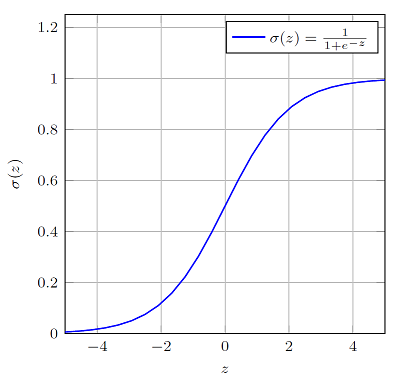

From the figure above we can observe that the Sigmoid function is bouned between 0 and 1. Such that if $z$ goes toward infinity ($z \to \infty$) then $\sigma(z)=\frac{1}{1+e^{-\infty}}=1$, and on the other hand when $z$ goes toward minus infinity ($z \to -\infty$) then $\sigma(z)=\frac{1}{1+e^{\infty}}=0$. Thus, we conclude that sigmoid function takes real number values as input and transforms them to values in the range [0,1] with $\sigma(0) = 0.5$.

In logistic regression, the activation function simply becomes the sigmoid function that we defined earlier, which is illustrated in the following figure:

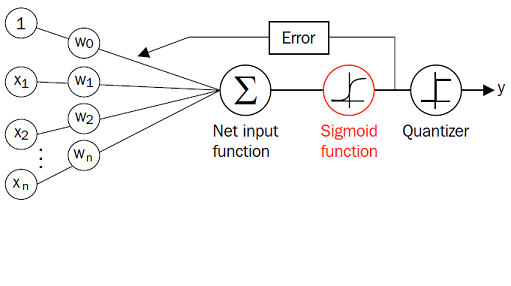

The output of the Sigmoid activation function is interpreted as the probability of particular sample belonging to class 1 $\sigma(z)=p\left(y=1|\mathbf{x,w}\right)$ given set of features $x$ and set of weights $w$. For instance, assume we have a binary classifier to classify samples of Iris-Versicolor ($y=1$) vs. Iris-Setosa ($y=0$). Then if we compute $\sigma(z)=0.9$, it means that the chance that this sample is an Iris-Versicolor flower is $90\%$. Similarly, the probability that this flower is an Iris-Setosa flower can be calculated as $p\left(y=0|\mathbf{x,w}\right) = 1 - p\left(y=1|\mathbf{x,w}\right) = 0.1$ or $10\%$.


So far we have discussed how Logistic regression makes predictions, but we did not talk about the cost function and learning process. Unlike the case in linear regression where we used MSE cost function, in logistic regression we use log-loss (also known as binary cross entropy (BCE)), given by the equation below:

\begin{equation}
    J(w)=\frac{1}{N} \sum_{i=1}^{N} [-y_{i}\cdot\log\left(\hat{y}_{i}\right)-\left(1-y_{i}\right)\cdot\log\left(1-\hat{y}_{i}\right)]
\end{equation}
where $y_{i}$ is the label  for training example $i$, $\hat{y}_{i}$ is the predicted class by applying the hypothesis or $\sigma(z)$.


For more information why we chose BCE over MSE, please refer to the lecture notes

Our main aim is to minimise our BCE cost function in order to get accurate predictions. In order to do that, we keep updating the parameter $w$ in the direction that minimises the cost function. The amount of change that we modify $w$ is called the gradient and is given by differentiating the cost function with respect to $w$. We can control how fast this gradient step is moving by introducing the learning rate ($\alpha$). This process is called Gradient Descent and is illustrated in the figure below:

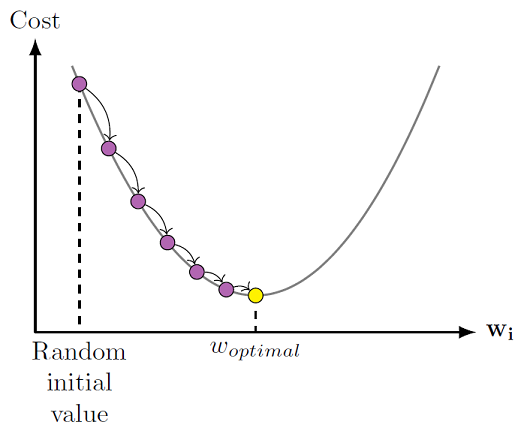


When the training is done and we want to predict the output using test data, the predicted probability can be converted into a binary outcome via a quantizer (unit step function) such that:

\begin{equation}
y_{pred} = \begin{cases}
      1 & \hat{y}\geq 0.5 \\
      0 & otherwise
   \end{cases}
\end{equation}


Reference:
"Python Machine Learning," Sebastian Raschka, Packt Publishing, 2015


# Data Used & Problem Definition

We will use logistic regression as a binary classifier between Setosa vs other classes (verginica and versicolor grouped together). Here we say that data points with features that result in output probabilities closer to 0 are likely Setosa, while values closer to 1 are likely not Setosa. For simplicity, we will consider two features, petal length and sepal length, which can be visualised in a 2D plot.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
import pandas as pd

In [2]:
iris = datasets.load_iris()

In [3]:
iris_data = pd.DataFrame(data=iris['data'],columns=iris['feature_names'])
iris_data["target"] = iris['target']

In [4]:
iris_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [5]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

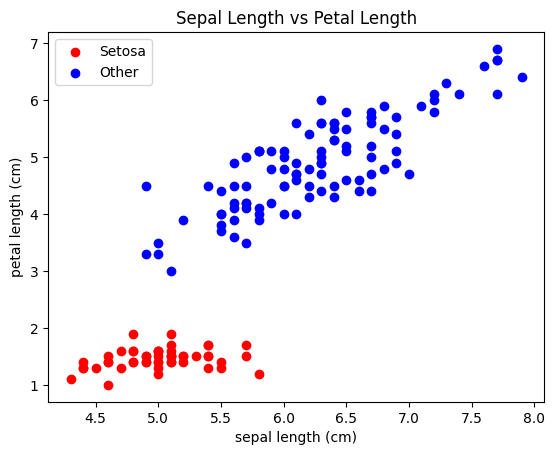

In [6]:
# Target labels are the index in iris.target_names
labels = iris_data.iloc[:,4]

# Setosa is assigned label 0, while all other classes will have a label of 1
y = np.where(labels == 0, 0, 1)

# Consider only two features - sepal length (column 0) and petal length (column 2)
# Bias term (intercept) is added to each data point (row)
X = iris_data.iloc[:,[0,2]]
intercept = np.ones((X.shape[0], 1))
X = np.concatenate((intercept, X), axis=1)

# Plot features in 2D plot - sepal length (x-axis) vs petal length (y-axis)
feat1, feat2 = 'sepal length (cm)', 'petal length (cm)'
X_target = iris_data[iris_data.target==0]
X_other = iris_data[iris_data.target!=0]

plt.scatter(X_target[feat1],X_target[feat2],color='red',marker='o',label="Setosa")
plt.scatter(X_other[feat1],X_other[feat2],color='blue',marker='o',label='Other')
plt.title("Sepal Length vs Petal Length")
plt.xlabel(feat1)
plt.ylabel(feat2)
plt.legend(loc='upper left')
plt.show()

In [7]:
def sigmoid(z):
    # Sigmoid function
    return 1 / (1 + np.exp(-z))

In [8]:
def cost(Y, y):
    # log-loss or Binary Cross Entropy (BCE)
    eps = 1e-15 # to avoid numerical error at log(0)
    return (-y * np.log(Y+eps) - (1 - y) * np.log(1 - Y + eps)).mean()

In [9]:
def plot_cost(loss):
    # Function for plotting the cost vs iterations.
    plt.plot(range(1, len(loss) + 1), loss)
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    # plt.savefig('plot.pdf')
    plt.show()

In [10]:
def predict(X, W):
    # Function for predicting on test data (see Task 1)
    prediction = sigmoid(np.dot(X, W))
    return prediction.round()

In [11]:
def fit(alpha, num_iter, X, y):
    # weights initialization
    W = np.zeros(X.shape[1])
    loss_list = []
    for i in range(num_iter):
        # Feed forward
        z = np.dot(X, W)
        Y = sigmoid(z)
        # Gradient
        W += alpha * (np.dot(X.T, (y-Y)) / y.size)
        loss = cost(Y, y)
        loss_list.append(loss)

        if i % 100 == 0:
            print(f'iteration: {i+1} \t', f'cost: {loss} \t', f'weights: {W} \t')
    plot_cost(loss_list)
    # This function will return the final weights as an array
    return W

iteration: 1 	 cost: 0.6931471805599433 	 weights: [0.00166667 0.01253    0.01391667] 	
iteration: 101 	 cost: 0.39716904888478627 	 weights: [-0.05071148 -0.07762237  0.42536019] 	
iteration: 201 	 cost: 0.29984517309777964 	 weights: [-0.10551432 -0.23097319  0.68989714] 	
iteration: 301 	 cost: 0.2382094249373507 	 weights: [-0.14864573 -0.34969591  0.90262115] 	
iteration: 401 	 cost: 0.196815362215292 	 weights: [-0.18374873 -0.44513976  1.07818086] 	
iteration: 501 	 cost: 0.1674853678274873 	 weights: [-0.21316007 -0.52436457  1.22669262] 	
iteration: 601 	 cost: 0.14576052746256243 	 weights: [-0.23838792 -0.5918273   1.3549739 ] 	
iteration: 701 	 cost: 0.12908024748143987 	 weights: [-0.26043675 -0.65044743  1.46769223] 	
iteration: 801 	 cost: 0.11589461609963037 	 weights: [-0.27999968 -0.70221333  1.56813002] 	
iteration: 901 	 cost: 0.1052199140543055 	 weights: [-0.29757115 -0.74852835  1.65866121] 	
iteration: 1001 	 cost: 0.0964055186179073 	 weights: [-0.31351439 -0.7

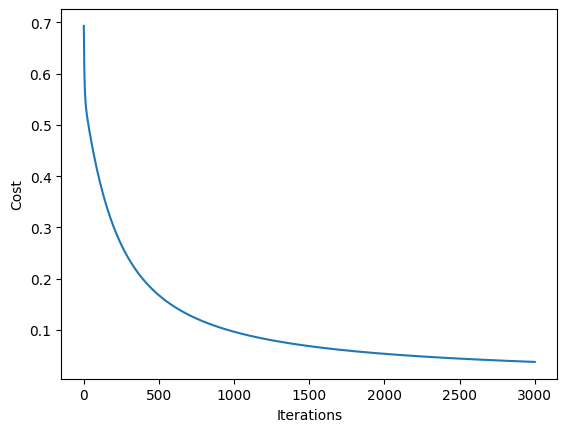

In [12]:
alpha = 0.01
num_iter = 3000
model_weights = fit(alpha, num_iter, X,y)

In [13]:
predictions = predict(X, model_weights)
pred = predictions.astype('int')
true = y.astype('int')

# Evaluation Metrics

Evaluation metrics are used to measure the performance of machine learning models. It is very important to evaluate the model after training takes place to decide whether the model can be implemented in the project or not. There are a variety of techniques used for evaluation such as classification accuracy, loss and confusion matrix. Confusion matrix is very useful tool for evaluation. It visualises the predictions for a classification problem against the real labels in table format.  Each row of the matrix represents the instances of real labels while each column represents the instances of predicted labels. The values of the confusion matrix are denoted by four categories, namely, true positive (TP), true negative (TN), false negative (FN) and false positive (FP). The outcomes of a confusion matrix can be visualised in Figure


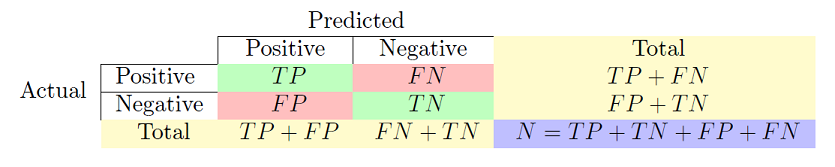

In [14]:
def compute_confusion_matrix(true, pred):

    num_cls = len(np.unique(true)) # Number of classes
    result = np.zeros((num_cls, num_cls))

    for i in range(len(true)):
        result[true[i]][pred[i]] += 1

    return result

conf_matrix = compute_confusion_matrix(true, pred)
print('Confusion matrix result: ')
print(conf_matrix)

diagonal_sum = conf_matrix.trace()
sum_of_all_elements = conf_matrix.sum()
accuracy = diagonal_sum / sum_of_all_elements
print('accuracy = {:0.2f}%'.format(accuracy*100))

Confusion matrix result: 
[[ 50.   0.]
 [  0. 100.]]
accuracy = 100.00%


## Task 1 [40 marks]

In the provided code, the network's performance was assessed using the same training dataset for both training and evaluation, which is not a recommended practice in evaluating machine learning algorithms. Your task is to adjust the code to split the data into two separate sets: a training set and a testing set. The training set should account for 80% of the original data, while the remaining 20% will constitute the test data. Additionally, as part of your report, you should address the following points:

1. **Importance of Having Two Datasets**: In your report, discuss the significance of using two distinct datasets (training and testing) when evaluating a machine learning algorithm.

2. **Code for Data Splitting**: Provide the code you used to divide the original dataset into the training and testing datasets. Ensure that the split is random and maintains data integrity.

3. **Confusion Matrix and Accuracy**: After modifying the code and training the model on the training dataset, calculate the confusion matrix and total accuracy of the algorithm using the testing dataset. Include these performance metrics in your report to assess the model's effectiveness in classifying data.

Please ensure that your code is well-documented and your report provides clear explanations of the concepts discussed.


Importance of Having Two Datasets

It is important on having 2 distinct datasets when evaluating machine learning model so that we can measure how well they learn. In another word, we know how ready the model is when measuring new unseen data.

In [15]:
# Data splitting
from sklearn.model_selection import train_test_split

# Split into train and test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11, stratify=y)


iteration: 1 	 cost: 0.6931471805599435 	 weights: [0.00166667 0.01258333 0.01405833] 	
iteration: 101 	 cost: 0.3927932083325494 	 weights: [-0.05227699 -0.07962503  0.42818067] 	
iteration: 201 	 cost: 0.29428297228776434 	 weights: [-0.10853824 -0.23471872  0.69359288] 	
iteration: 301 	 cost: 0.23222185302590978 	 weights: [-0.15290757 -0.35458976  0.90639144] 	
iteration: 401 	 cost: 0.19076529036020345 	 weights: [-0.18906368 -0.4507735   1.08149611] 	
iteration: 501 	 cost: 0.16153752196581 	 weights: [-0.2193823  -0.53045906  1.22922457] 	
iteration: 601 	 cost: 0.13998578193247752 	 weights: [-0.24540328 -0.59818869  1.35652403] 	
iteration: 701 	 cost: 0.12350485835809402 	 weights: [-0.26815513 -0.6569385   1.46814331] 	
iteration: 801 	 cost: 0.11052346524616811 	 weights: [-0.28834893 -0.70873519  1.56741595] 	
iteration: 901 	 cost: 0.10004774679621561 	 weights: [-0.30649263 -0.75500866  1.65674839] 	
iteration: 1001 	 cost: 0.09142251144681947 	 weights: [-0.32295977 -0

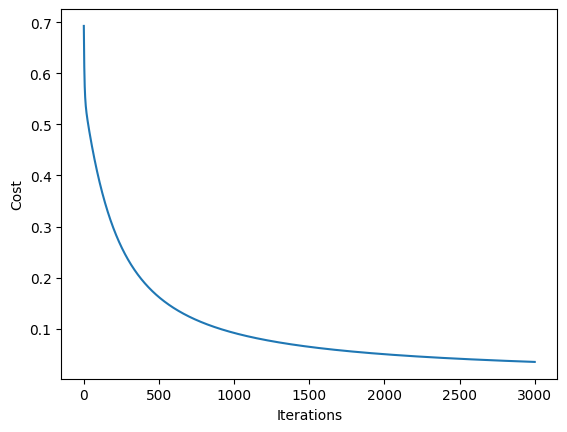

Test accuracy result: 1.0


In [16]:
alpha = 0.01
num_iter = 3000
model_weights = fit(alpha, num_iter, x_train,y_train)

predictions_after_split = predict(x_test, model_weights)
pred_after_split = predictions_after_split.astype('int')
true_after_split = y_test.astype('int')

accuracy = np.mean(predictions_after_split == y_test)
print(f'Test accuracy result: {accuracy}')

In [17]:
# Confusion matrix after splitting data
conf_matrix = compute_confusion_matrix(true_after_split, pred_after_split)
print('Confusion matrix result: ')
print(conf_matrix)

diagonal_sum = conf_matrix.trace()
sum_of_all_elements = conf_matrix.sum()
accuracy = diagonal_sum / sum_of_all_elements
print('accuracy = {:0.2f}%'.format(accuracy*100))

Confusion matrix result: 
[[10.  0.]
 [ 0. 20.]]
accuracy = 100.00%


## Task 2 [20 marks]

In the provided code, the primary objective was to classify Iris-Setosa versus other classes. Your task is to modify the code so that it can classify Iris-Versicolor versus other classes and Iris-Virginica versus other classes separately. For each case, you should divide the dataset into training and testing subsets. Additionally, your report should cover the following aspects:

1. **Dataset Adjustment Code**: Provide the code you used to adjust the dataset for each classification scenario, ensuring that you have separate training and testing data for Iris-Versicolor versus other classes and Iris-Virginica versus other classes.

2. **Reporting Weights**: Present the final weights obtained for each classification case.

3. **Performance Comparison**: Compare the performance of the network for each classification case. Discuss any differences in performance and provide justifications for why the performance may vary between the two cases. Consider factors such as dataset characteristics and class separability.

Ensure that your code modifications are clearly documented, and your report provides insightful explanations for the observed differences in classification performance.


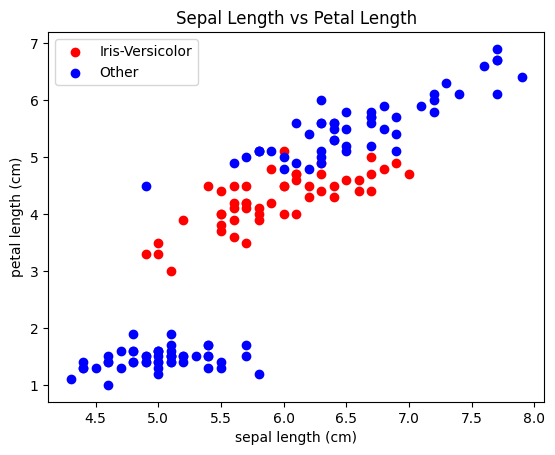

iteration: 1 	 cost: 0.6931471805599435 	 weights: [-0.00166667 -0.00939167 -0.00469167] 	
iteration: 101 	 cost: 0.632915418542409 	 weights: [-0.03239036 -0.13947449  0.06203886] 	
iteration: 201 	 cost: 0.6230434975683579 	 weights: [-0.04753375 -0.19365584  0.14331911] 	
iteration: 301 	 cost: 0.6172522694170327 	 weights: [-0.05845203 -0.2355632   0.20545339] 	
iteration: 401 	 cost: 0.6137802563511711 	 weights: [-0.06622805 -0.26831101  0.25349577] 	
iteration: 501 	 cost: 0.6116585981333983 	 weights: [-0.0716369  -0.29413784  0.29101125] 	
iteration: 601 	 cost: 0.6103407028359114 	 weights: [-0.07524046 -0.31467228  0.32055119] 	
iteration: 701 	 cost: 0.6095103931210147 	 weights: [-0.07745221 -0.33111643  0.34397298] 	
iteration: 801 	 cost: 0.6089806060725126 	 weights: [-0.07858104 -0.34437048  0.36265169] 	
iteration: 901 	 cost: 0.6086384932998892 	 weights: [-0.07886086 -0.3551175   0.3776209 ] 	
iteration: 1001 	 cost: 0.6084148503938843 	 weights: [-0.07847092 -0.363

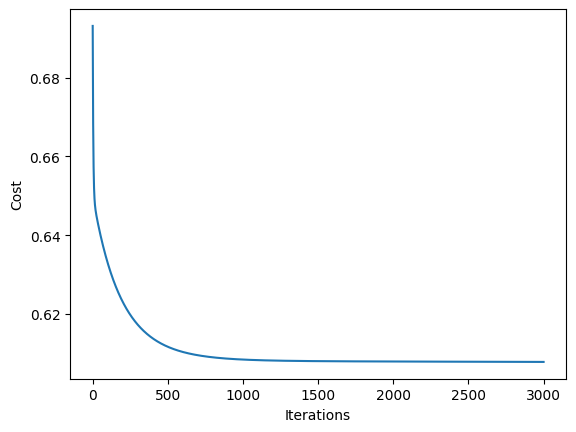

In [21]:
# Target labels are the index in iris.target_names
labels = iris_data.iloc[:,4]

# Iris-Versicolor vs Other
# Versicolor is 1, the rest = 0
y = np.where(labels == 1, 1, 0)

# Consider only two features - sepal length (column 0) and petal length (column 2)
# Bias term (intercept) is added to each data point (row)
X = iris_data.iloc[:,[0,2]]
intercept = np.ones((X.shape[0], 1))
X = np.concatenate((intercept, X), axis=1)

# Plot features in 2D plot - sepal length (x-axis) vs petal length (y-axis)
feat1, feat2 = 'sepal length (cm)', 'petal length (cm)'
X_target = iris_data[iris_data.target==1]
X_other = iris_data[iris_data.target!=1]

plt.scatter(X_target[feat1],X_target[feat2],color='red',marker='o',label="Iris-Versicolor")
plt.scatter(X_other[feat1],X_other[feat2],color='blue',marker='o',label='Other')
plt.title("Sepal Length vs Petal Length")
plt.xlabel(feat1)
plt.ylabel(feat2)
plt.legend(loc='upper left')
plt.show()

# Split into Train and Test with ration 8:2. Then fit it into the model
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11, stratify=y)

# Fit into the model. Select the alpha (learning rate) and number of iteration
alpha = 0.01
num_iter = 3000
model_weights = fit(alpha, num_iter, x_train,y_train)

predictions_after_split = predict(x_test, model_weights)
pred_after_split = predictions_after_split.astype('int')
true_after_split = y_test.astype('int')



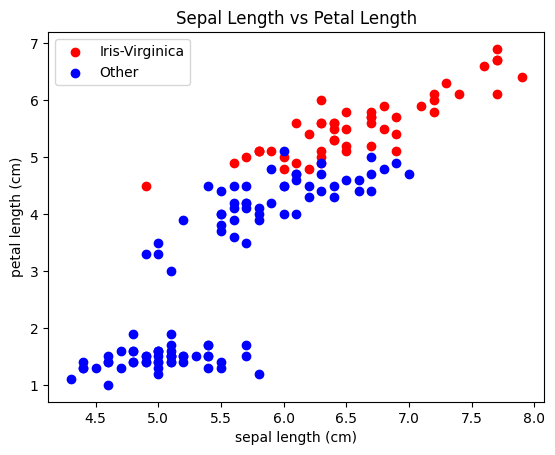

iteration: 1 	 cost: 0.6931471805599435 	 weights: [-0.00166667 -0.00730417 -0.00039583] 	
iteration: 101 	 cost: 0.560963445582487 	 weights: [-0.0781199  -0.22427093  0.25281228] 	
iteration: 201 	 cost: 0.4927008885094699 	 weights: [-0.13435593 -0.36532192  0.46404281] 	
iteration: 301 	 cost: 0.4490462966688669 	 weights: [-0.18104975 -0.47950795  0.63184237] 	
iteration: 401 	 cost: 0.41883309673435 	 weights: [-0.22122977 -0.5753594   0.77064672] 	
iteration: 501 	 cost: 0.3965493360861826 	 weights: [-0.25678743 -0.65819335  0.88928995] 	
iteration: 601 	 cost: 0.37927986816547554 	 weights: [-0.28893691 -0.73142367  0.99332525] 	
iteration: 701 	 cost: 0.3653717451624539 	 weights: [-0.31848678 -0.79732557  1.08638143] 	
iteration: 801 	 cost: 0.3538279905331276 	 weights: [-0.34599532 -0.85747129  1.1709232 ] 	
iteration: 901 	 cost: 0.3440147096297557 	 weights: [-0.37186076 -0.91298327  1.24868419] 	
iteration: 1001 	 cost: 0.33551046995650124 	 weights: [-0.3963755  -0.964

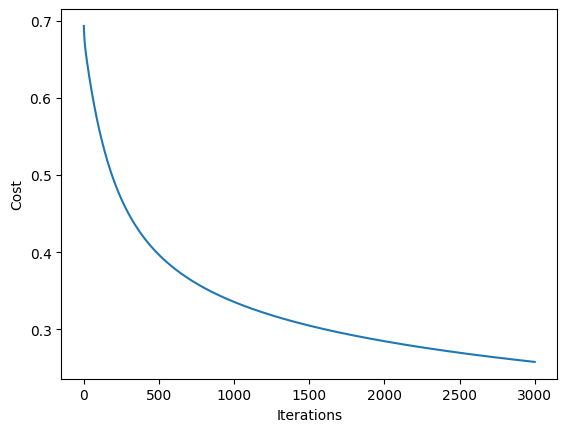

In [22]:
# Iris-Virginica vs Other
# Virginica is 2, the rest = 0
y = np.where(labels == 2, 1, 0)

# Consider only two features - sepal length (column 0) and petal length (column 2)
# Bias term (intercept) is added to each data point (row)
X = iris_data.iloc[:,[0,2]]
intercept = np.ones((X.shape[0], 1))
X = np.concatenate((intercept, X), axis=1)

# Plot features in 2D plot - sepal length (x-axis) vs petal length (y-axis)
feat1, feat2 = 'sepal length (cm)', 'petal length (cm)'
X_target = iris_data[iris_data.target==2]
X_other = iris_data[iris_data.target!=2]

plt.scatter(X_target[feat1],X_target[feat2],color='red',marker='o',label="Iris-Virginica")
plt.scatter(X_other[feat1],X_other[feat2],color='blue',marker='o',label='Other')
plt.title("Sepal Length vs Petal Length")
plt.xlabel(feat1)
plt.ylabel(feat2)
plt.legend(loc='upper left')
plt.show()

# Split into Train and Test with ration 8:2. Then fit it into the model
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11, stratify=y)

# Fit into the model. Select the alpha (learning rate) and number of iteration
alpha = 0.01
num_iter = 3000
model_weights = fit(alpha, num_iter, x_train,y_train)

predictions_after_split = predict(x_test, model_weights)
pred_after_split = predictions_after_split.astype('int')
true_after_split = y_test.astype('int')

Based on the results, it shows that the Setosa-Iris has a better result than others due to more uniform characteristics of its data than the other 2.

## Task 3 [40 marks]

In this tutorial, you were introduced to the parameter $\alpha$, also known as the learning rate. A fixed value of $0.01$ was chosen for our algorithm. Your task is to investigate the effect of selecting different values of $\alpha$ for the Iris-Setosa vs. All classifier. In your report, please cover the following aspects:

1. **Variation of $\alpha$**: Experiment with different values of $\alpha$ (e.g., 0.0001, 0.1, 1, 100). Note that you may want to print the loss more frequently to observe the initial behavior of the algorithm when using different $\alpha$ values.

2. **Code Execution**: Run the code for each of the specified $\alpha$ values and record the performance of the network for each case.

3. **Visualisation**: Include a graphical representation of the cost versus epochs for each $\alpha$ value. Additionally, report the accuracy of the test data and provide confusion matrices for each $\alpha$ value.

4. **Discussion**: In your own words, explain why the performance of the algorithm changes when using different $\alpha$ values. Discuss the effect of the learning rate on the gradient descent process, considering aspects like convergence speed, stability, and the risk of overshooting.

Ensure that your code adjustments are well-documented, and your report provides clear insights into the impact of varying the learning rate on the performance of the Iris-Setosa vs. All classifier.
